In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
feature_vectors = pd.read_csv("39-feature-vector.csv")
labels_true = feature_vectors["class"]
feature_vectors = feature_vectors.drop(columns=["class"])
feature_vectors = feature_vectors.iloc[:, 0:13].values

In [3]:
model = TSNE(n_components=2, learning_rate=150, perplexity=50, verbose=2, angle=0.1).fit_transform(feature_vectors)

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6604 samples in 0.008s...
[t-SNE] Computed neighbors for 6604 samples in 0.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6604
[t-SNE] Computed conditional probabilities for sample 2000 / 6604
[t-SNE] Computed conditional probabilities for sample 3000 / 6604
[t-SNE] Computed conditional probabilities for sample 4000 / 6604
[t-SNE] Computed conditional probabilities for sample 5000 / 6604
[t-SNE] Computed conditional probabilities for sample 6000 / 6604
[t-SNE] Computed conditional probabilities for sample 6604 / 6604
[t-SNE] Mean sigma: 0.051966
[t-SNE] Computed conditional probabilities in 0.151s
[t-SNE] Iteration 50: error = 85.8347321, gradient norm = 0.0092322 (50 iterations in 1.141s)
[t-SNE] Iteration 100: error = 74.5822754, gradient norm = 0.0017866 (50 iterations in 0.874s)
[t-SNE] Iteration 150: error = 73.9761658, gradient norm = 0.0006036 (50 iterations in 0.830s)
[t-SNE] Iteration 200: error =

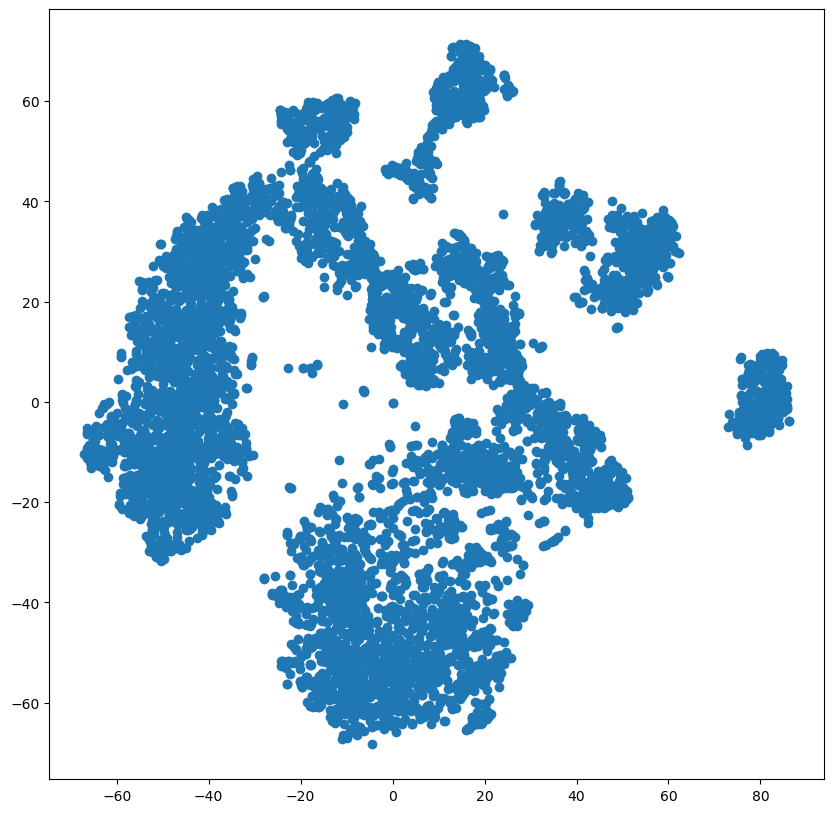

In [4]:
x_axis=model[:,0]
y_axis=model[:,1]

plt.figure(figsize = (10,10))
plt.scatter(x_axis, y_axis)
plt.show()

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=26.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=26.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=26.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py

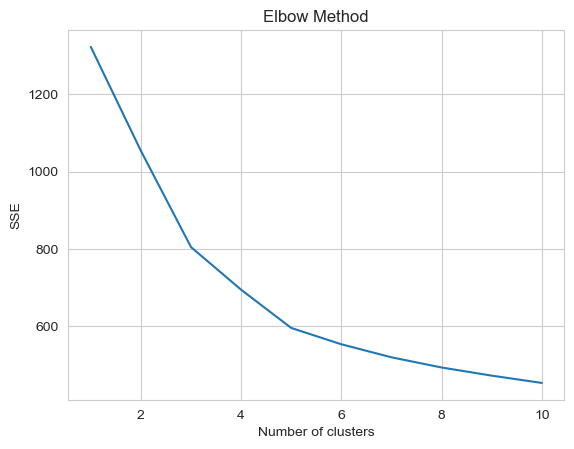

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize an empty list to store SSE values
sse = []

# Fit KMeans algorithm on the dataset for k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(feature_vectors)
    sse.append(kmeans.inertia_)

# Plot SSE against k
sns.set_style("whitegrid")
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_km = km.fit_predict(model)
labels = km.labels_

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=26.
  warnings.warn(


In [38]:
model[y_km == 0, 0]

array([-39.27698 , -28.127766, -28.07085 , ..., -55.254406, -54.726532,
       -48.235065], dtype=float32)

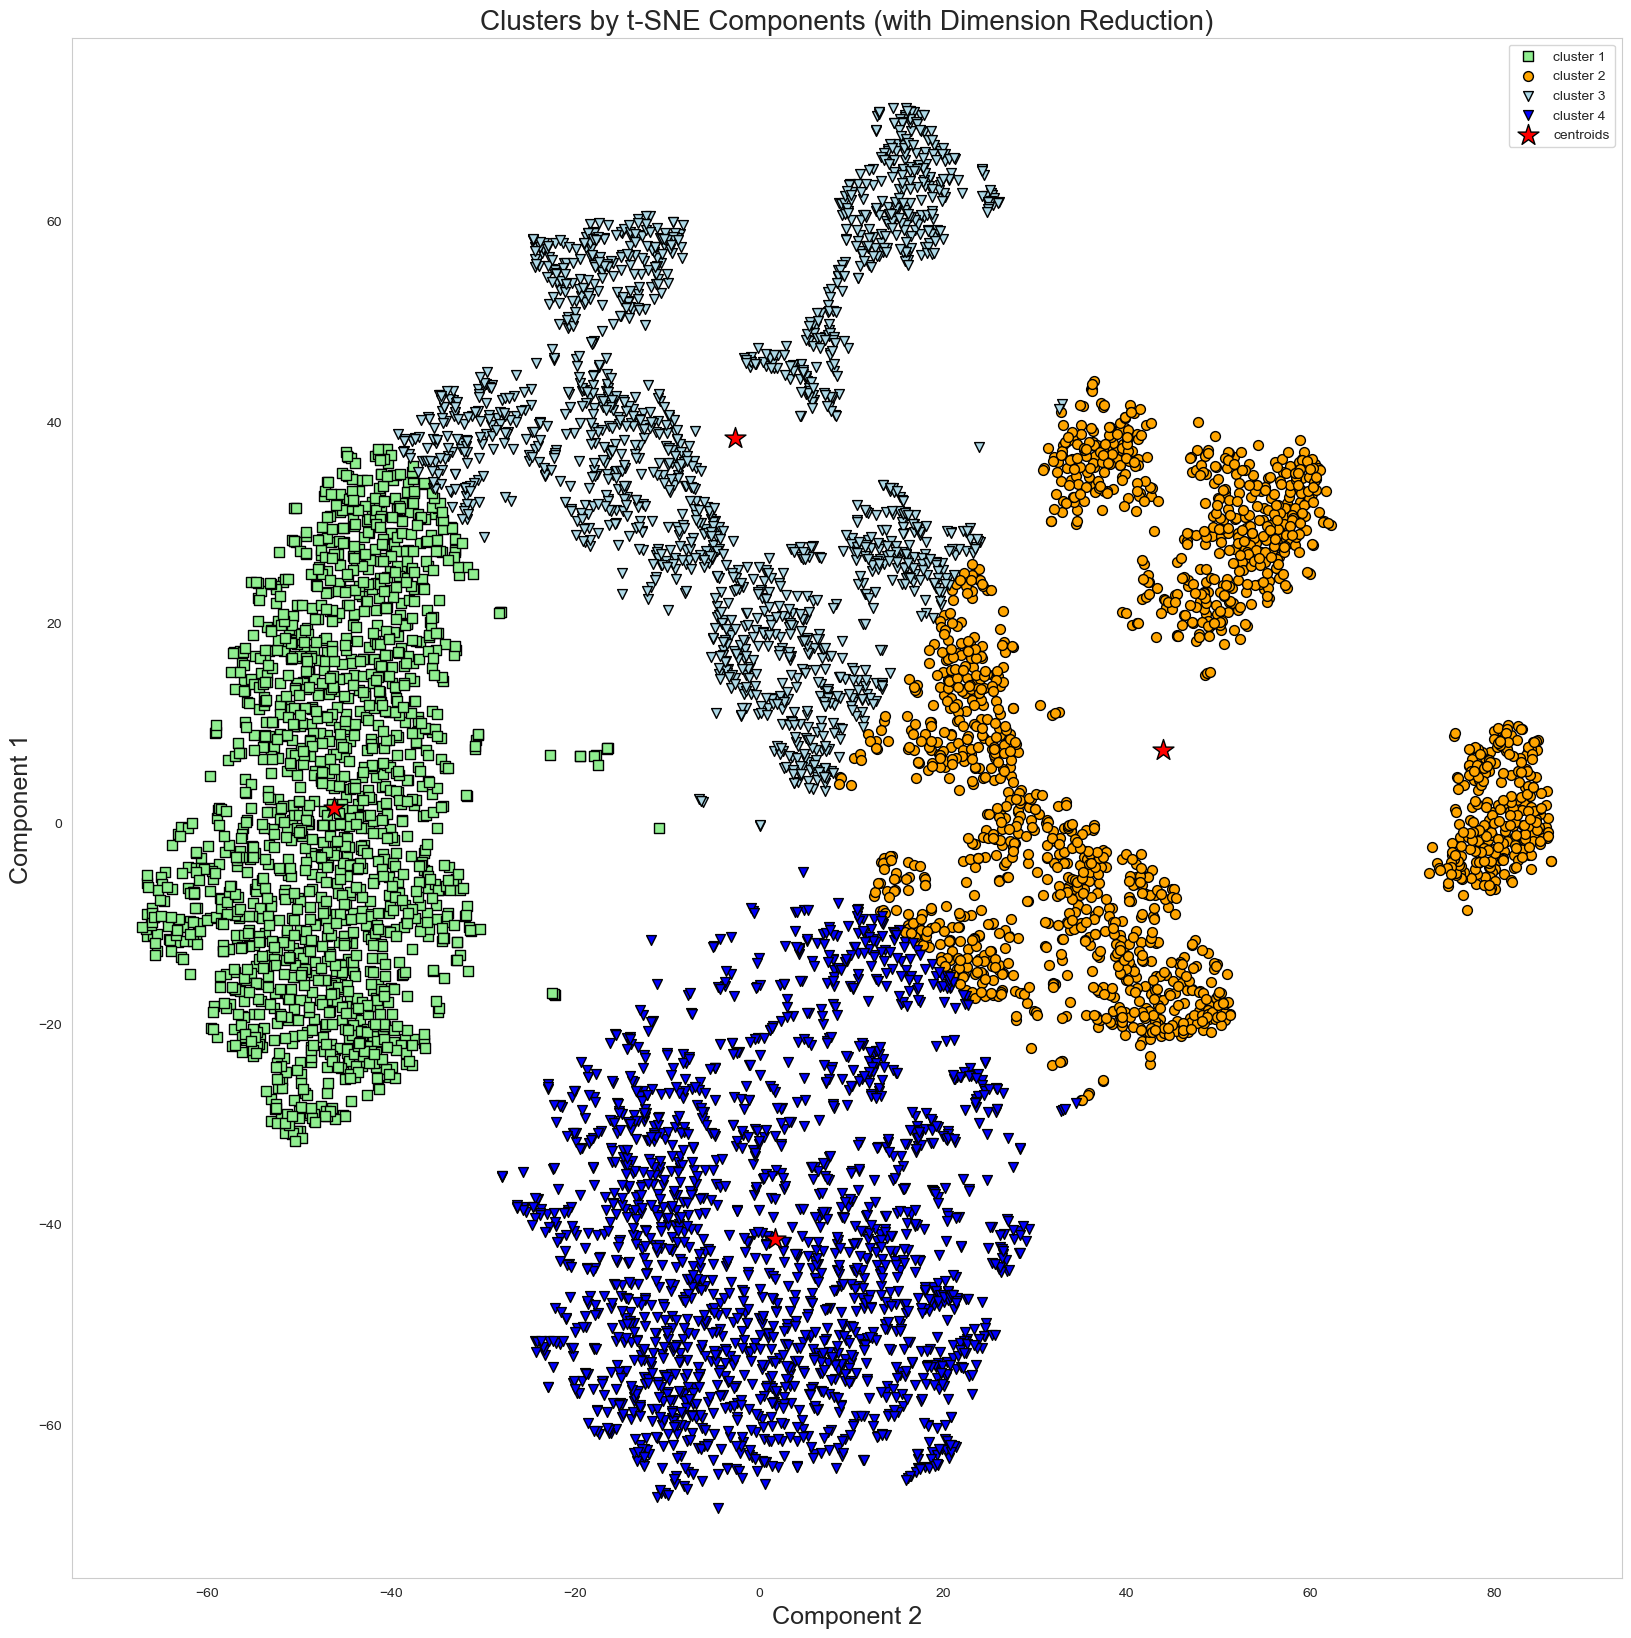

In [39]:
# plot the 3 clusters
plt.figure(figsize=(20, 20))
plt.scatter(
    model[y_km == 0, 0], model[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    model[y_km == 1, 0], model[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    model[y_km == 2, 0], model[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model[y_km == 3, 0], model[y_km == 3, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title('Clusters by t-SNE Components (with Dimension Reduction)', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.grid()
plt.show()

In [42]:
kmeans_data_old = pd.read_csv('kmeans_results.csv')

#encoding class values
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('other', str(0))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('biophony', str(1))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('geophony', str(2))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('anthrophony', str(3))

y_km = kmeans_data_old['class']
# y_km.drop(y_km.tail(1).index, inplace=True)
y_km = y_km.values
y_km

array(['3', '3', '3', ..., '0', '0', '0'], dtype=object)

[Text(0.5, 1.0, 'TSNE Plot with Ground Truth Overlayed'),
 Text(0, 0.5, 'TSNE Component 1'),
 Text(0.5, 0, 'TSNE Component 2')]

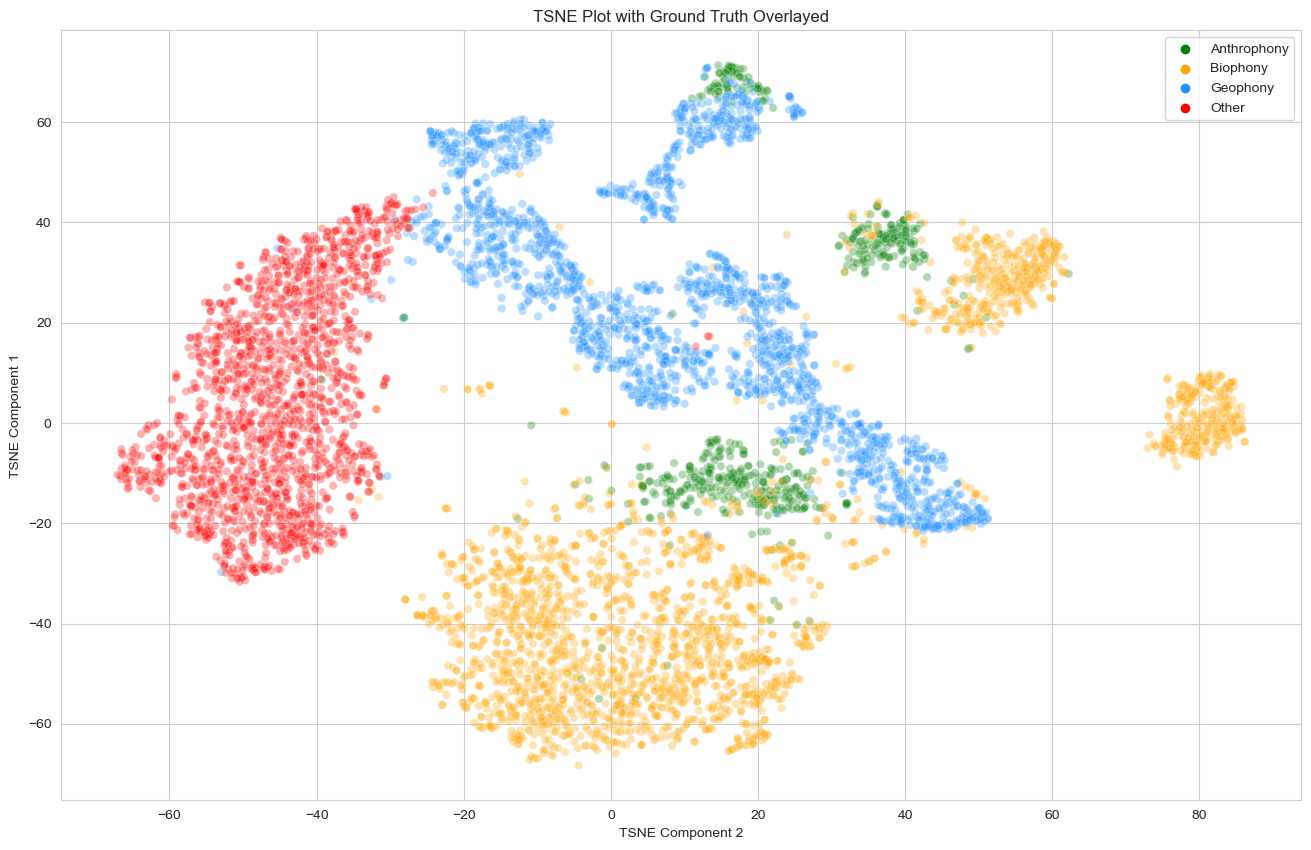

In [43]:
import seaborn as sns

x_axis=model[:,0]
y_axis=model[:,1]

plt.figure(figsize=(16,10))
ax=sns.scatterplot(
    x=x_axis, y=y_axis,
    hue=y_km,
    legend="full",
    alpha=0.3,
    palette=['green','orange','dodgerblue','red']
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Anthrophony', 'Biophony', 'Geophony', 'Other'])
ax.set(title="TSNE Plot with Ground Truth Overlayed", ylabel="TSNE Component 1", xlabel="TSNE Component 2")

In [ ]:
y_km

array([4, 4, 4, ..., 5, 5, 5])

Saving the tsne output as a csv file

In [89]:
import numpy as np

# save the numpy array to a csv file
np.savetxt("tsne.csv", model, delimiter=",", header="1, 2")

In [ ]:
kmeans_data_old = pd.read_csv('kmeans_results.csv')

#encoding class values
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('other', str(0))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('biophony', str(1))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('geophony', str(2))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('anthrophony', str(3))

y_km = kmeans_data_old['class']
y_km.drop(y_km.tail(1).index, inplace=True)
y_km = y_km.values
y_km

array(['3', '3', '3', ..., '0', '0', '0'], dtype=object)

In [81]:
from sklearn.cluster import AgglomerativeClustering

single_linkage = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='average')
labels_pred = single_linkage.fit_predict(model)

In [82]:
model[labels_pred == 0, 0]

array([ 15.861119  ,  15.116755  ,  19.696543  ,  16.441387  ,
        20.219522  ,  17.973038  ,  19.07542   ,  14.669419  ,
        14.227146  ,  20.20664   ,  16.523422  ,  19.9529    ,
        16.410234  ,  18.436054  ,  18.701012  ,  17.526617  ,
        14.020507  ,  14.061379  ,  13.600286  ,  13.229111  ,
        16.009554  ,  16.913908  ,  16.346228  ,  16.516022  ,
        16.461058  ,  16.456408  ,  15.9336195 ,  15.357907  ,
        14.897373  ,  14.518026  ,  15.848039  ,  15.639307  ,
        18.013393  ,  12.689978  ,  17.077974  ,  18.978828  ,
        17.18299   ,  15.920711  ,  15.749432  ,  14.582953  ,
        14.73304   ,  14.623973  ,  12.410934  ,  14.661566  ,
        17.963694  ,  13.561721  ,  12.016335  ,  15.598708  ,
        15.197408  ,  15.857649  ,  18.195913  ,  16.405725  ,
        14.729928  ,  11.001212  ,  21.281845  ,  15.465526  ,
        15.789126  ,  17.131538  ,  20.049685  ,  17.595728  ,
        16.065702  ,  17.477167  ,  20.935932  ,  14.19

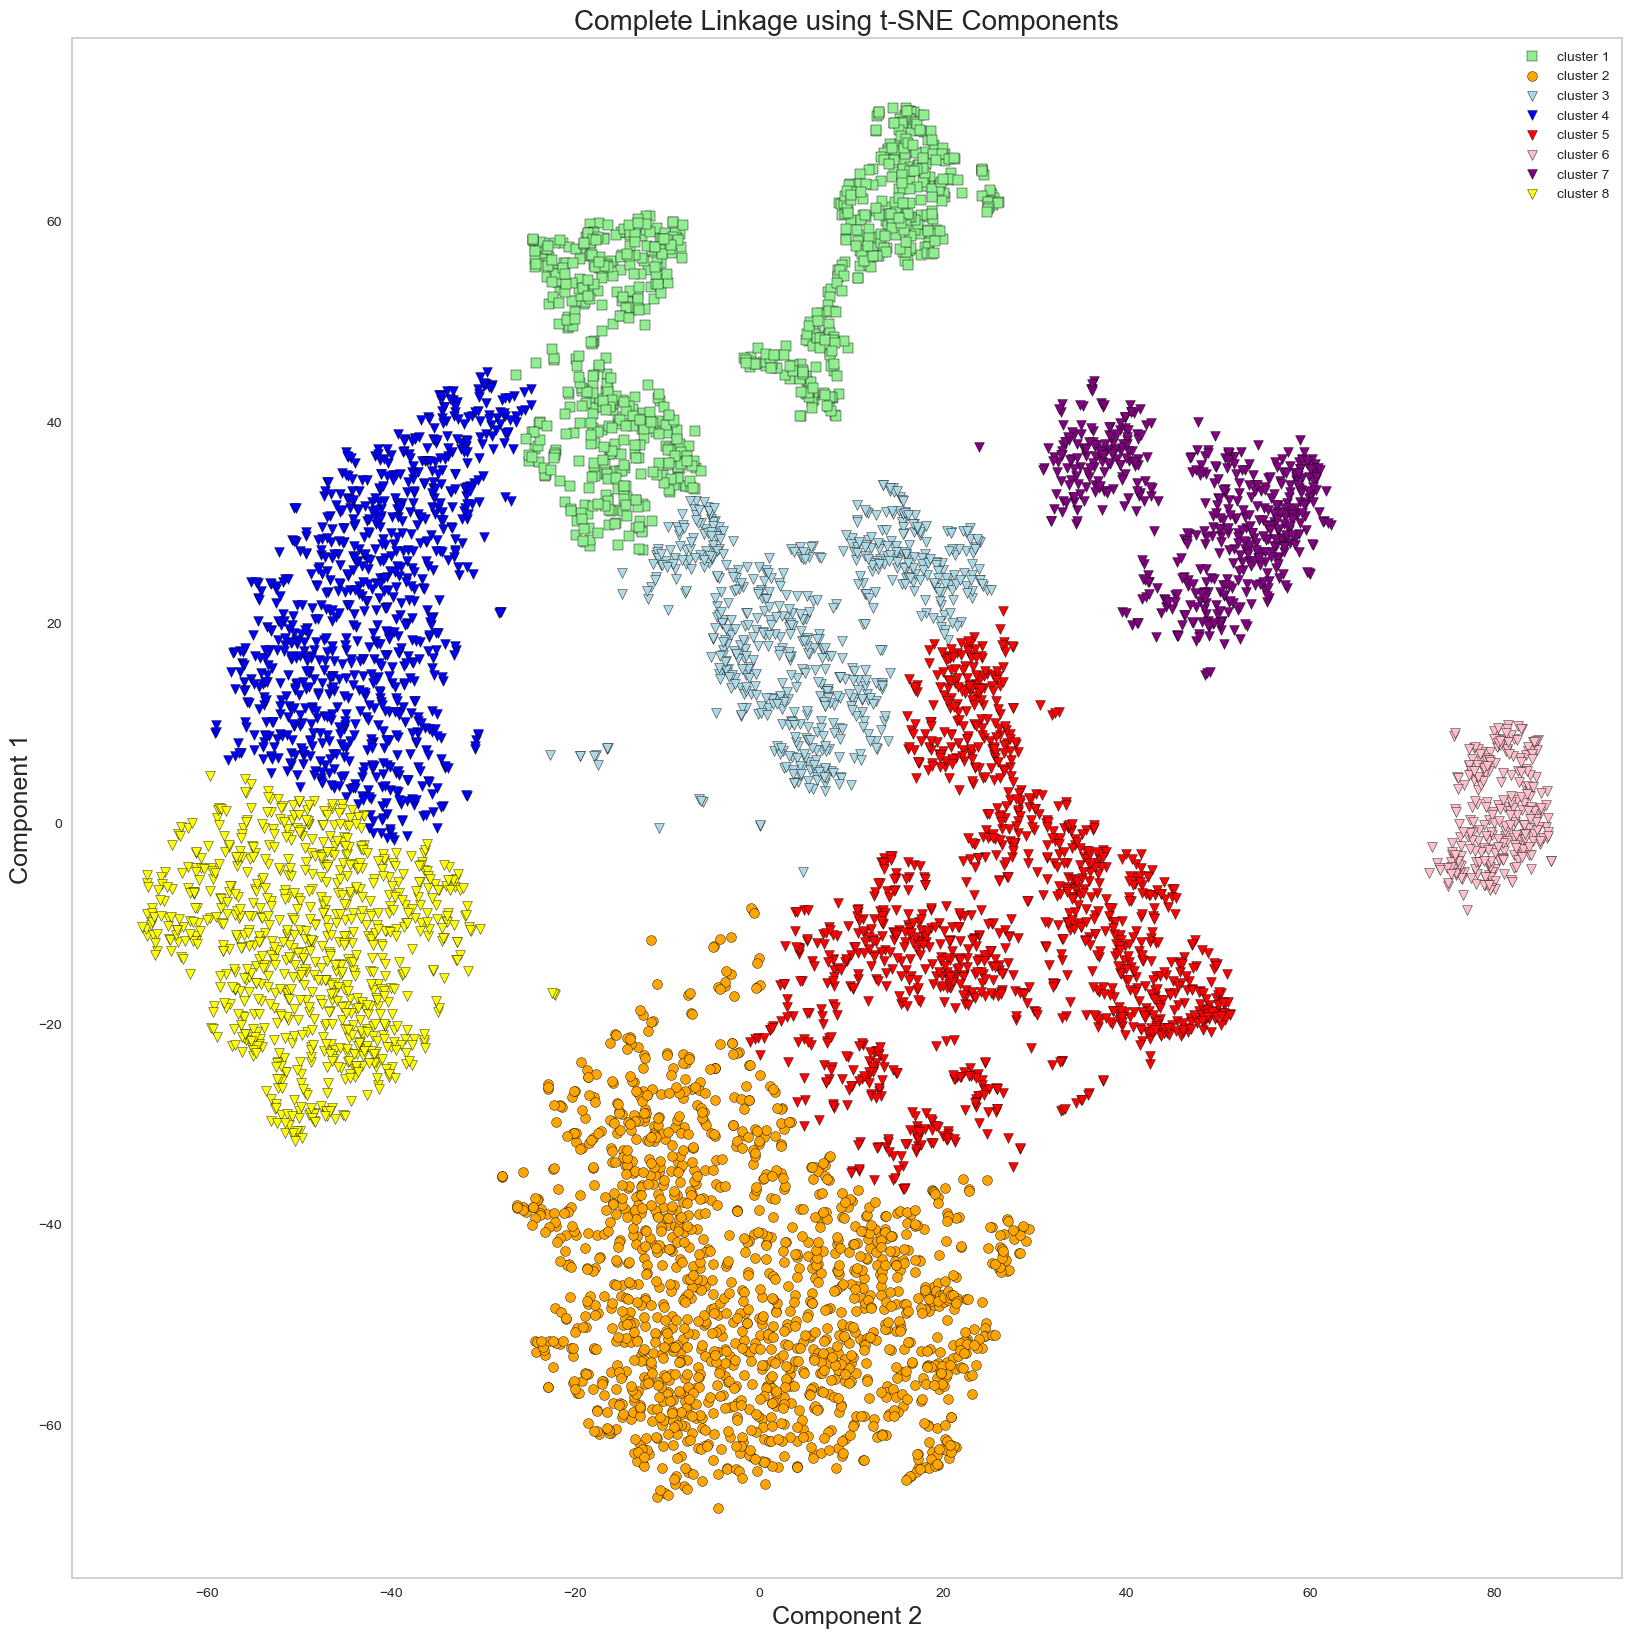

In [83]:
# plot the 3 clusters
plt.figure(figsize=(20, 20))
plt.scatter(
    model[labels_pred == 0, 0], model[labels_pred == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    model[labels_pred == 1, 0], model[labels_pred == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    model[labels_pred == 2, 0], model[labels_pred == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model[labels_pred == 3, 0], model[labels_pred == 3, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    model[labels_pred == 4, 0], model[labels_pred == 4, 1],
    s=50, c='red',
    marker='v', edgecolor='black',
    label='cluster 5'
)

plt.scatter(
    model[labels_pred == 5, 0], model[labels_pred == 5, 1],
    s=50, c='pink',
    marker='v', edgecolor='black',
    label='cluster 6'
)

plt.scatter(
    model[labels_pred == 6, 0], model[labels_pred == 6, 1],
    s=50, c='purple',
    marker='v', edgecolor='black',
    label='cluster 7'
)

plt.scatter(
    model[labels_pred == 7, 0], model[labels_pred == 7, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 8'
)

plt.legend(scatterpoints=1)
plt.title('Complete Linkage using t-SNE Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.grid()
plt.show()

In [84]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn import metrics


# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [85]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

In [86]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}
X = feature_vectors
y = labels_true

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 4, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    print(f"Rand-score for {dist_measure} is {round(metrics.rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Rand-score for {dist_measure} is {round(metrics.adjusted_rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Mutual-score for {dist_measure} is {round(metrics.adjusted_mutual_info_score(y, pyLabels)*100, 2)}%")
    print(f"Homogeneity-score for {dist_measure} is {round(metrics.homogeneity_score(y, pyLabels)*100, 2)}%")
    print(f"Completeness-score for {dist_measure} is {round(metrics.completeness_score(y, pyLabels)*100, 2)}%")
    print(f"V-measure-score for {dist_measure} is {round(metrics.v_measure_score(y, pyLabels)*100, 2)}%")
    print(f"Fowlkes-mallows-score for {dist_measure} is {round(metrics.fowlkes_mallows_score(y, pyLabels)*100, 2)}%")
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")
    print(" ")

Rand-score for 0 is 64.14%
Adj-Rand-score for 0 is 19.21%
Adj-Mutual-score for 0 is 28.66%
Homogeneity-score for 0 is 27.12%
Completeness-score for 0 is 30.48%
V-measure-score for 0 is 28.7%
Fowlkes-mallows-score for 0 is 45.74%
The purity score for euclidean distance is 60.61%
 
Rand-score for 1 is 64.06%
Adj-Rand-score for 1 is 16.26%
Adj-Mutual-score for 1 is 24.58%
Homogeneity-score for 1 is 23.75%
Completeness-score for 1 is 25.56%
V-measure-score for 1 is 24.62%
Fowlkes-mallows-score for 1 is 42.29%
The purity score for squared euclidean distance is 56.13%
 
Rand-score for 2 is 67.91%
Adj-Rand-score for 2 is 24.1%
Adj-Mutual-score for 2 is 31.06%
Homogeneity-score for 2 is 30.94%
Completeness-score for 2 is 31.25%
V-measure-score for 2 is 31.09%
Fowlkes-mallows-score for 2 is 47.11%
The purity score for manhattan distance is 61.39%
 
Rand-score for 3 is 64.86%
Adj-Rand-score for 3 is 23.54%
Adj-Mutual-score for 3 is 30.8%
Homogeneity-score for 3 is 28.48%
Completeness-score for 3